In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
date = '28012021-0943'

projectionData = None
projectionData = pd.read_csv('../Assets/Resources/DataSimulation/AlgoHints/' + date + 'Magnitudes.csv', sep = ";", decimal = '.')
projectionData = projectionData.dropna()

In [5]:
projectionData.head()

Time     Time0  Config  NbBloc  Grasp  PosSkelThumb  DebugProbsA  \
0  3.867084  3.867084      18       0  False      0.115286          0.0   
1  5.174416  5.174416      18       0  False      0.115286          0.0   
2  5.299190  5.299190      18       0  False      0.115286          0.0   
3  5.395027  5.395027      18       0  False      0.115286          0.0   
4  5.459908  5.459908      18       0  False      0.115286          0.0   

   ProbsA  PosSkelIndex  DebugProbsB  ...  ProjFromTraj.1  PhalanxContact.1  \
0     0.0      0.159765          0.0  ...          0.0000             False   
1     0.0      0.159765          0.0  ...          0.0000             False   
2     0.0      0.159765          0.0  ...          0.2375             False   
3     0.0      0.159765          0.0  ...          0.1687             False   
4     0.0      0.159765          0.0  ...          0.1898             False   

     SkelID.1  PosSkel.1 ProjOnPlane0.1  ProbsPositionPlane0.1  \
0  b_l_index3   0.159765         0.0000                    0.0   
1  b_l_index3   0.159765         0.7301                    0.0   
2  b_l_index3   0.159765         0.7463                    0.0   
3  b_l_index3   0.159765         0.7071                    0.0   
4  b_l_index3   0.159765         0.7142                    0.0   

   ProjOnPlane1.1  ProbsPositionPlane1.1  ProjOnPlane2.1  \
0          0.0000                    0.0          0.0000   
1          0.7301                    0.0          0.7301   
2          0.7522                    0.0          0.7491   
3          0.7066                    0.0          0.7068   
4          0.7144                    0.0          0.7143   

   ProbsPositionPlane2.1  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 43 columns]

In [32]:
projectionData.columns[:]

Index(['Time', 'Time0', 'Config', 'NbBloc', 'Grasp', 'PosSkelThumb',
       'DebugProbsA', 'ProbsA', 'PosSkelIndex', 'DebugProbsB', 'ProbsB',
       'Dot(T/P)', 'Dot(T/I)', 'BoneID', 'Name', 'CollPos', 'PosPredict',
       'ClosestDist', 'ProjFromTraj', 'PhalanxContact', 'SkelID', 'PosSkel',
       'ProjOnPlane0', 'ProbsPositionPlane0', 'ProjOnPlane1',
       'ProbsPositionPlane1', 'ProjOnPlane2', 'ProbsPositionPlane2',
       'BoneID.1', 'Name.1', 'CollPos.1', 'PosPredict.1', 'ClosestDist.1',
       'ProjFromTraj.1', 'PhalanxContact.1', 'SkelID.1', 'PosSkel.1',
       'ProjOnPlane0.1', 'ProbsPositionPlane0.1', 'ProjOnPlane1.1',
       'ProbsPositionPlane1.1', 'ProjOnPlane2.1', 'ProbsPositionPlane2.1',
       'Grasp_0.5'],
      dtype='object')

In [11]:
projectionData['Grasp_0.5'] = projectionData['Grasp']*0.5

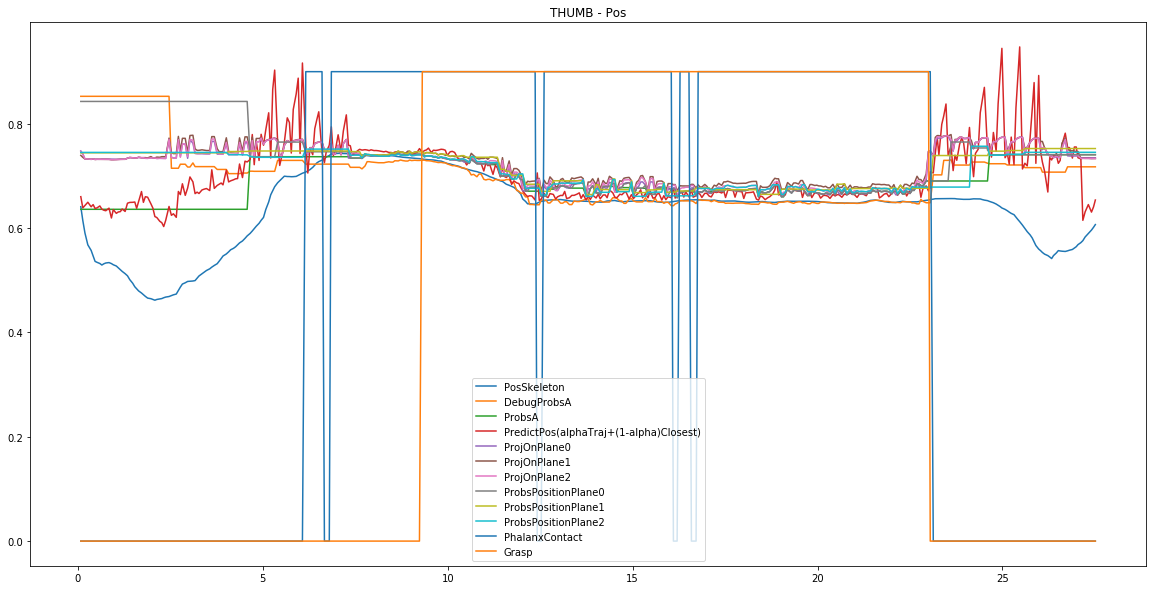

In [38]:
cond0 = (projectionData['Config'] == 10)# & (projectionData['NbBloc'] == 0)
plt.figure(figsize=(20,10))

plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['PosSkelThumb'][1:], label ="PosSkeleton")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['DebugProbsA'][1:], label ="DebugProbsA")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsA'][1:], label ="ProbsA")
plt.plot(projectionData[cond0]['Time0'][1:], 0.5*(projectionData[cond0]['ProjFromTraj'] + projectionData[cond0]['ClosestDist'])[1:], label ="PredictPos(alphaTraj+(1-alpha)Closest)")
#plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ClosestDist'][1:], label ="ClosestDistance")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane0'][1:], label ="ProjOnPlane0")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane1'][1:], label ="ProjOnPlane1")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane2'][1:], label ="ProjOnPlane2")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane0'][1:], label ="ProbsPositionPlane0")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane1'][1:], label ="ProbsPositionPlane1")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane2'][1:], label ="ProbsPositionPlane2")
plt.plot(projectionData[cond0]['Time0'][1:], 0.9*projectionData[cond0]['PhalanxContact'][1:], label ="PhalanxContact")
plt.plot(projectionData[cond0]['Time0'][1:], 0.9*projectionData[cond0]['Grasp'][1:], label ="Grasp")

plt.title('THUMB - Pos')
plt.legend()
#plt.xlim(0, 25)
#plt.ylim(0.5, 0.8)



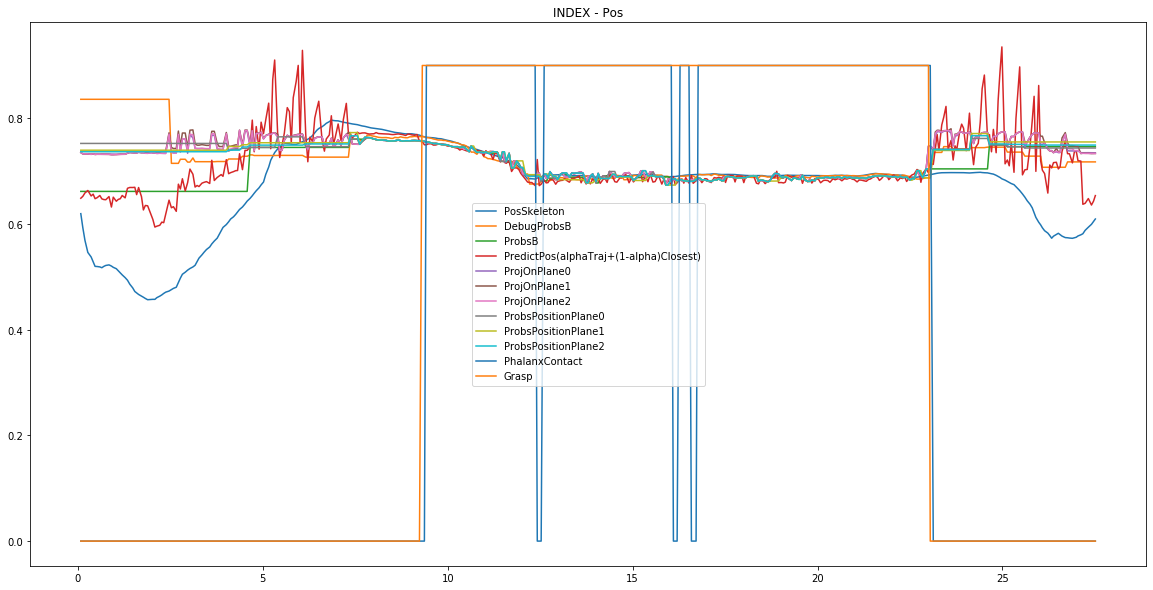

In [37]:
cond0 = (projectionData['Config'] == 10)# & (projectionData['NbBloc'] == 0)
plt.figure(figsize=(20,10))

plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['PosSkelIndex'][1:], label ="PosSkeleton")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['DebugProbsB'][1:], label ="DebugProbsB")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsB'][1:], label ="ProbsB")
plt.plot(projectionData[cond0]['Time0'][1:], 0.5*(projectionData[cond0]['ProjFromTraj.1'] + projectionData[cond0]['ClosestDist'])[1:], label ="PredictPos(alphaTraj+(1-alpha)Closest)")
#plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ClosestDist'][1:], label ="ClosestDistance")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane0.1'][1:], label ="ProjOnPlane0")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane1.1'][1:], label ="ProjOnPlane1")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProjOnPlane2.1'][1:], label ="ProjOnPlane2")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane0.1'][1:], label ="ProbsPositionPlane0")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane1.1'][1:], label ="ProbsPositionPlane1")
plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ProbsPositionPlane2.1'][1:], label ="ProbsPositionPlane2")
plt.plot(projectionData[cond0]['Time0'][1:], 0.9*projectionData[cond0]['PhalanxContact.1'][1:], label ="PhalanxContact")
plt.plot(projectionData[cond0]['Time0'][1:], 0.9*projectionData[cond0]['Grasp'][1:], label ="Grasp")

plt.title('INDEX - Pos')
plt.legend()
#plt.xlim(0, 25)
#plt.ylim(0.5, 0.8)



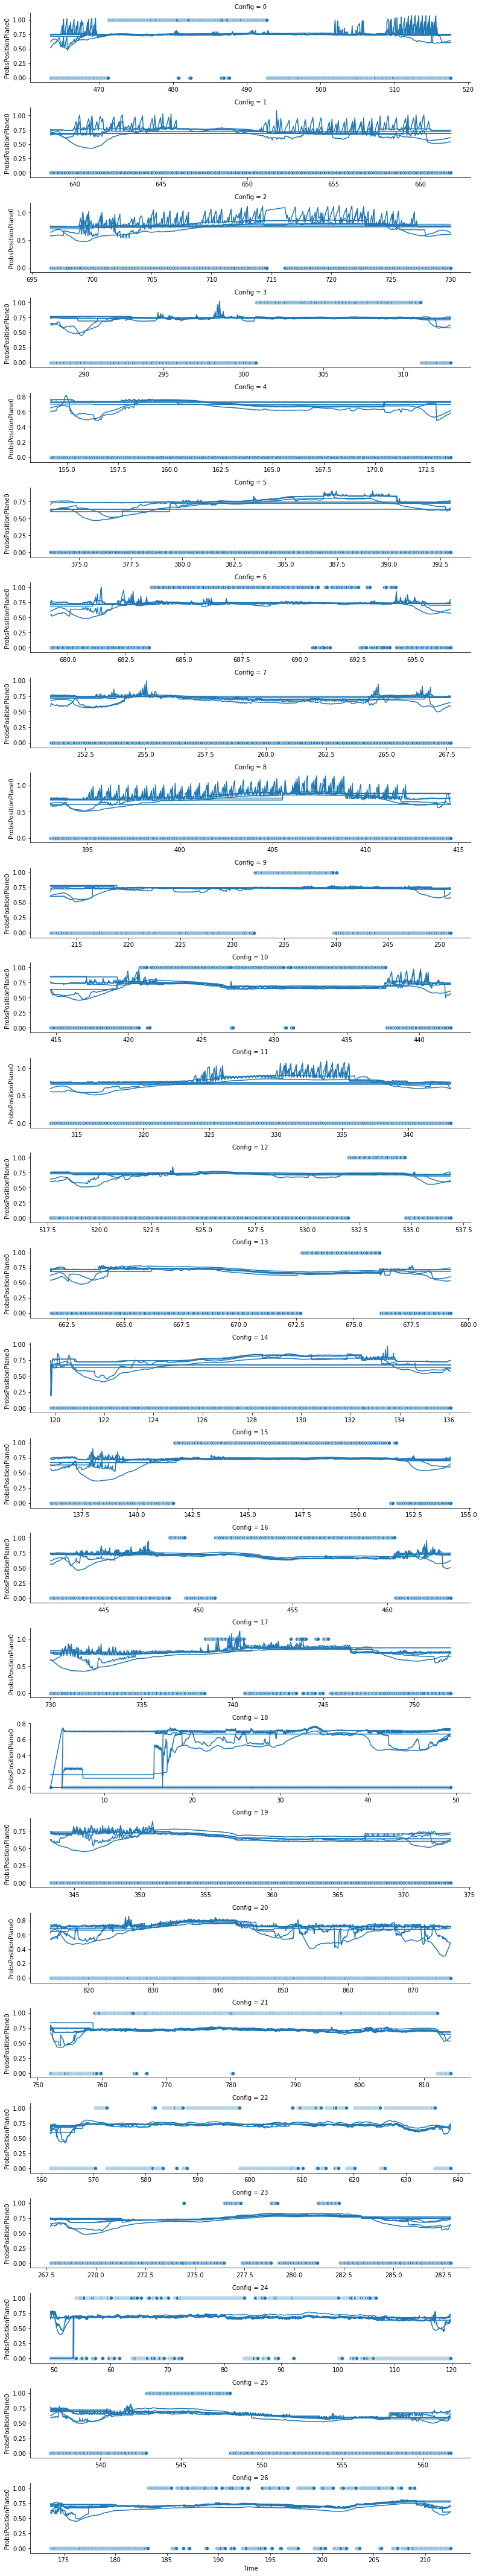

In [19]:
#condition = 'ErrorIndex.9'
condition = 'Trial_Thumb'
g = sns.FacetGrid(projectionData, row='Config', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
g.map(sns.scatterplot, 'Time', 'PhalanxContact')
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', 'PosSkelIndex')
g.map(sns.lineplot, 'Time', 'DebugProbsA')
g.map(sns.lineplot, 'Time', 'ProbsA')
g.map(sns.lineplot, 'Time', 'ProjFromTraj')
g.map(sns.lineplot, 'Time', 'ClosestDist')
g.map(sns.lineplot, 'Time', 'ProjOnPlane0')
g.map(sns.lineplot, 'Time', 'ProbsPositionPlane0')


g.add_legend()
#g.set(ylabel = 'D(IndexTip/Index Target)')

#labels = ['SmallBall From the Side','SmallBall From the Top','MediumBall From the Side','MediumBall From the Top','BigBall From the Side','BigBall From the Top'])
#plt.legend(title='', loc='upper left', labels=[])
#plt.show(g)

#new_title = ''
#g._legend.set_title(new_title)
## replace labels
#new_labels = ['']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('./Projections/Seaborn/'+ date + '-' + condition + '.png')

In [7]:
config0 = None
config0 = pd.DataFrame()
config0 = projectionData[projectionData['Config'] == 0]

config1 = None
config1 = pd.DataFrame()
config1 = projectionData[projectionData['Config'] == 1]

config2 = None
config2 = pd.DataFrame()
config2 = projectionData[projectionData['Config'] == 2]

config3 = None
config3 = pd.DataFrame()
config3 = projectionData[projectionData['Config'] == 3]

config4 = None
config4 = pd.DataFrame()
config4 = projectionData[projectionData['Config'] == 4]

config5 = None
config5 = pd.DataFrame()
config5 = projectionData[projectionData['Config'] == 5]

(-0.2, 0.2)

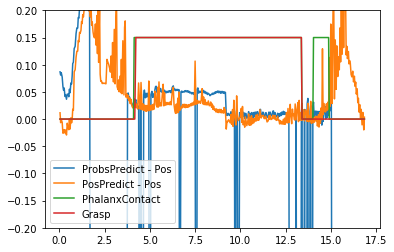

In [34]:
cond0 = (projectionData['Config'] == 6)# & (projectionData['NbBloc'] == 0)

plt.plot(projectionData[cond0]['Time'][1:], (projectionData[cond0]['ProbsPositionPlane0.5'][1:] - projectionData[cond0]['CollPosMagnitude.6'][1:]), label ="ProbsPredict - Pos")
plt.plot(projectionData[cond0]['Time'][1:], (projectionData[cond0]['PosPredictMagnitude.6'][1:] - projectionData[cond0]['CollPosMagnitude.6'][1:]), label ="PosPredict - Pos")
#plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['CollPosMagnitude.6'][1:], label ="PositionCollider")
plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['PhalanxContact.6'][1:]*0.15, label ="PhalanxContact")
plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['Grasp'][1:]*0.15, label ="Grasp")

#plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
#plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
#plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
#plt.xlim(0, 25)
plt.ylim(-0.2, 0.2)

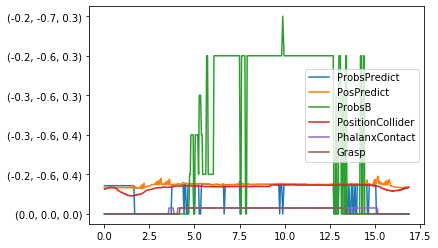

In [42]:
cond0 = (projectionData['Config'] == 6)# & (projectionData['NbBloc'] == 0)

plt.plot(projectionData[cond0]['Time'][1:], (projectionData[cond0]['ProbsPositionPlane0.8'][1:]), label ="ProbsPredict")
plt.plot(projectionData[cond0]['Time'][1:], (projectionData[cond0]['PosPredictMagnitude.9'][1:]), label ="PosPredict")
plt.plot(projectionData[cond0]['Time'][1:], (projectionData[cond0]['ProbsB'][1:]), label ="ProbsB")
plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['CollPosMagnitude.6'][1:], label ="PositionCollider")
plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['PhalanxContact.9'][1:]*0.15, label ="PhalanxContact")
plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['Grasp'][1:]*0.15, label ="Grasp")

#plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
#plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
#plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
#plt.xlim(0, 25)
#plt.ylim(0.6, 0.8)

(0, 25)

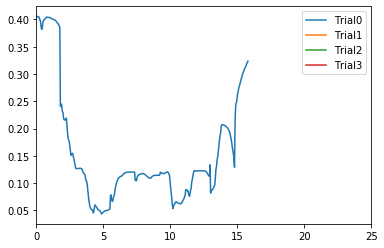

In [11]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorThumb.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

(0, 25)

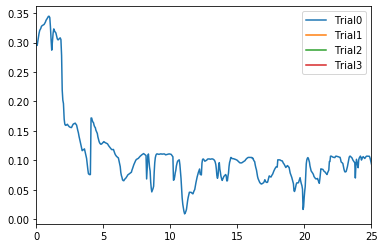

In [12]:
cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

(0, 25)

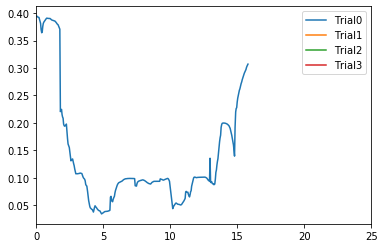

In [13]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

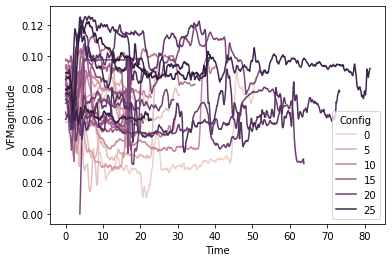

In [6]:
sns.lineplot(x='Time', y='VFMagnitude', hue ='Config', data = projectionData)

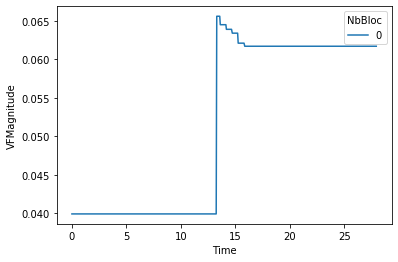

In [15]:
sns.lineplot(x='Time', y='VFMagnitude', hue ='NbBloc', data = projectionData[projectionData['Config'] == 2])

In [16]:
projectionData.columns

Index(['Time', 'Config', 'NbBloc', 'Grasp', 'VF', 'VFMagnitude', 'ProjVFX',
       'ProjVFY', 'ProjVFZ', 'BoneID',
       ...
       'ClosestPosition.18', 'ProjClosest.18', 'ErrorClosest.18',
       'IndexTarget.18', 'ProjIndex.18', 'ErrorIndex.18', 'MiddleTarget.18',
       'ProjMiddle.18', 'ErrorMiddle.18', 'Grasp_0.5'],
      dtype='object', length=295)

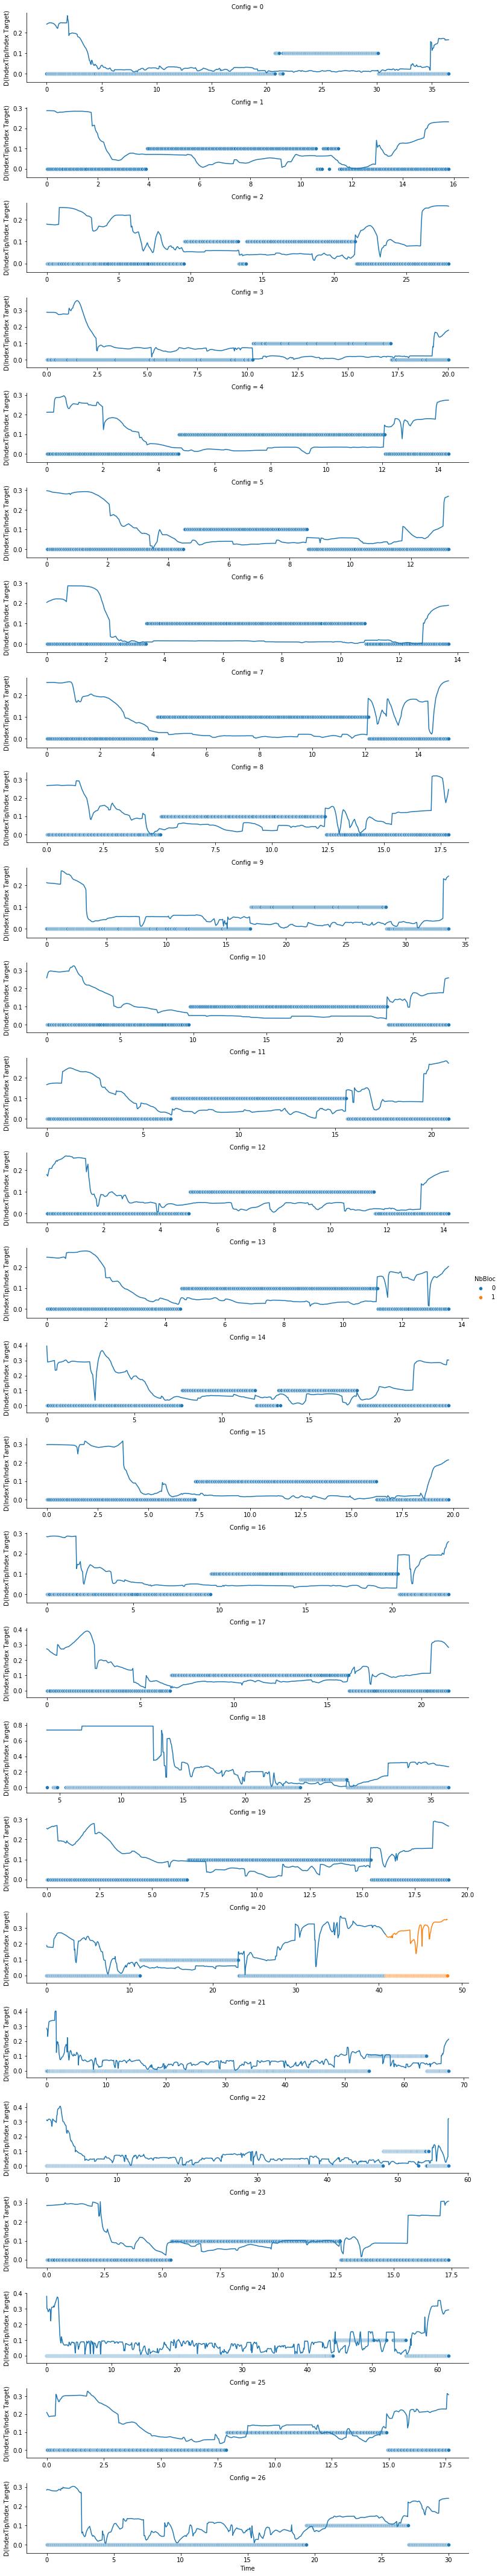

In [17]:
condition = 'ErrorIndex.9'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
g.map(sns.scatterplot, 'Time', 'Grasp_0.5')
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'D(IndexTip/Index Target)')
#labels = ['SmallBall From the Side','SmallBall From the Top','MediumBall From the Side','MediumBall From the Top','BigBall From the Side','BigBall From the Top'])
#plt.legend(title='', loc='upper left', labels=[])
#plt.show(g)

#new_title = ''
#g._legend.set_title(new_title)
## replace labels
#new_labels = ['']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('./Projections/Seaborn/'+ date + '-' + condition + '.png')

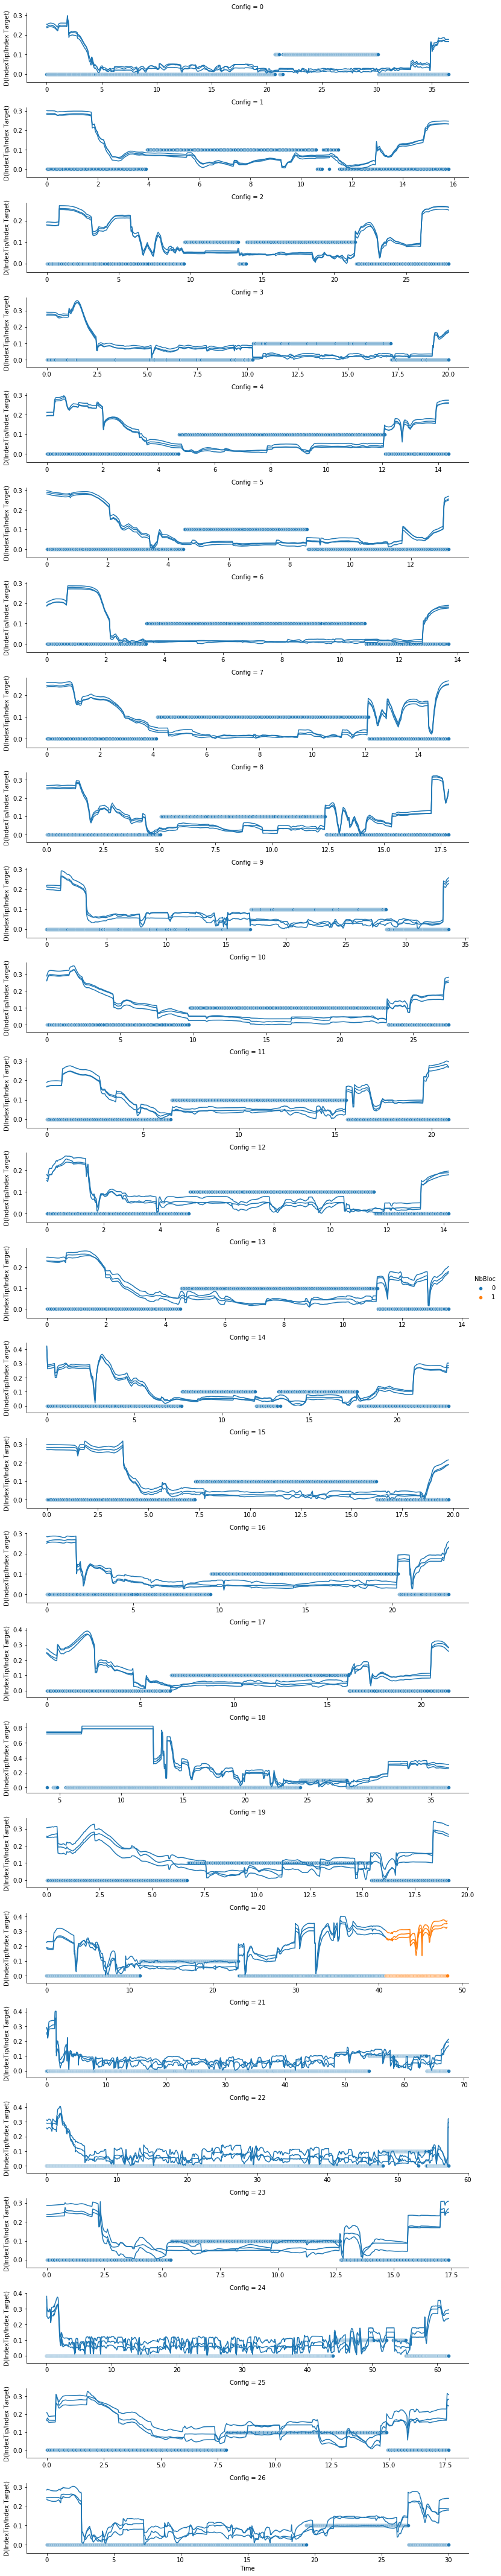

In [18]:
condition = 'ErrorIndex.9'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
g.map(sns.scatterplot, 'Time', 'Grasp_0.5')
g.map(sns.lineplot, 'Time', 'ErrorThumb.9')
g.map(sns.lineplot, 'Time', 'ErrorMiddle.9')
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'D(IndexTip/Index Target)')
#labels = ['SmallBall From the Side','SmallBall From the Top','MediumBall From the Side','MediumBall From the Top','BigBall From the Side','BigBall From the Top'])
#plt.legend(title='', loc='upper left', labels=[])
#plt.show(g)

#new_title = ''
#g._legend.set_title(new_title)
## replace labels
#new_labels = ['']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('./Projections/Seaborn/'+ date + '-' + condition + '.png')

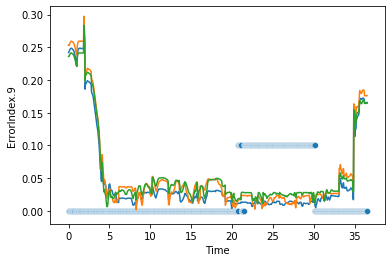

In [20]:
sns.lineplot(x='Time', y='ErrorIndex.9', data = projectionData[projectionData['Config'] == 0])
sns.lineplot(x='Time', y='ErrorThumb.9', data = projectionData[projectionData['Config'] == 0])
sns.lineplot(x='Time', y='ErrorMiddle.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere1.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere2.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere3.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere4.9', data = projectionData[projectionData['Config'] == 0])
sns.scatterplot(x='Time', y='Grasp_0.5', data = projectionData[projectionData['Config'] == 0])



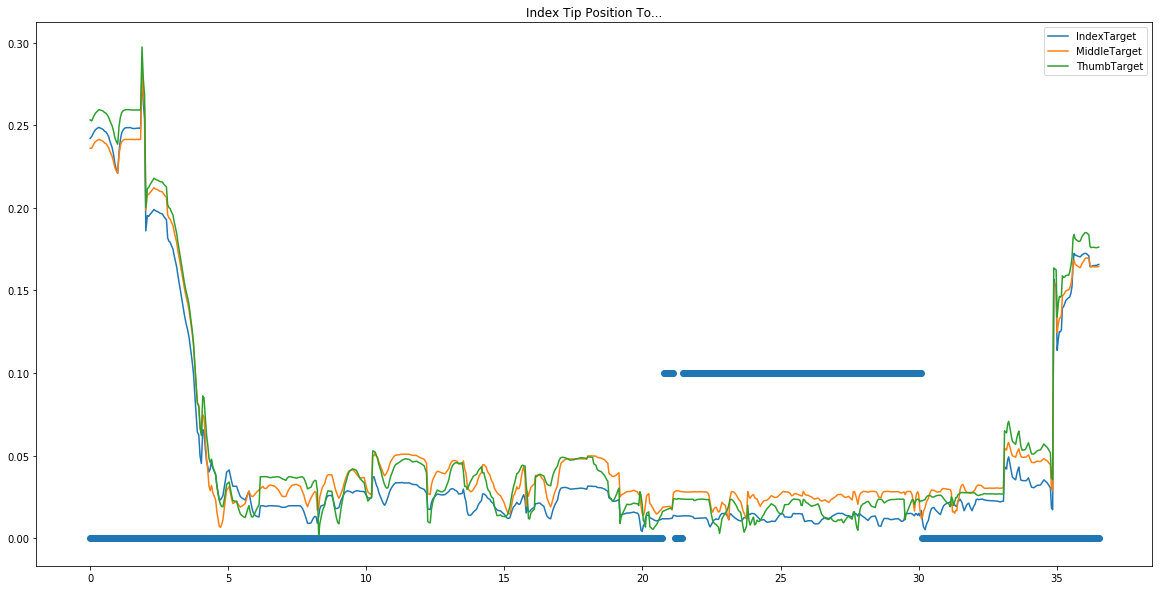

In [21]:
plt.figure(figsize=(20,10))
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorIndex.9'], label ="IndexTarget")
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorMiddle.9'], label ="MiddleTarget")
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorThumb.9'], label ="ThumbTarget")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere1.9'], label ="Sphere1Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere2.9'], label ="Sphere2Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere3.9'], label ="Sphere3Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere4.9'], label ="Sphere4Target")
plt.scatter(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['Grasp_0.5'])
plt.title('Index Tip Position To...')
plt.legend()


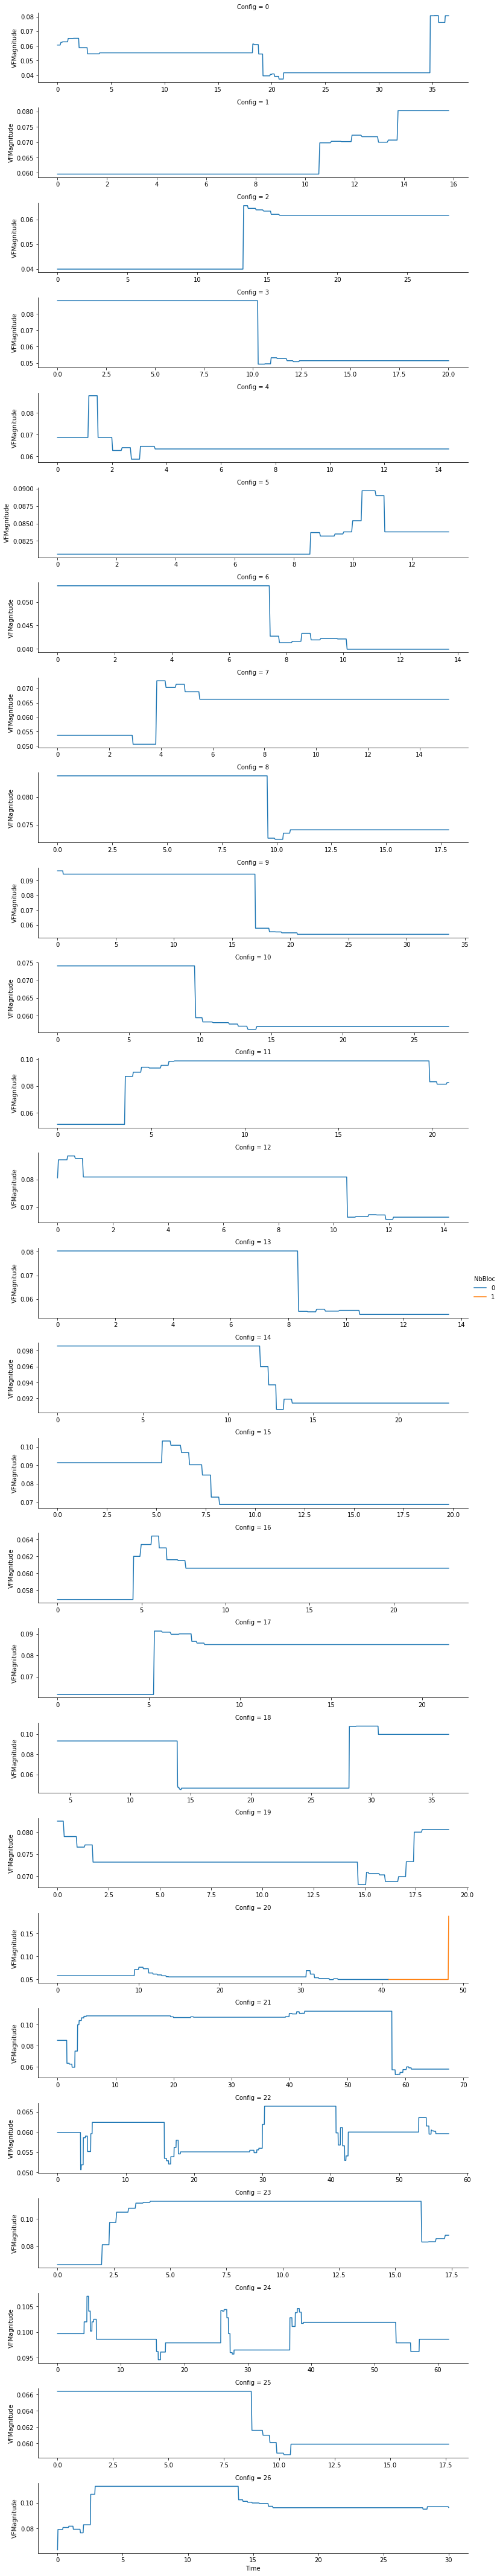

In [22]:
condition = 'VFMagnitude'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'VFMagnitude')

g.savefig('./Projections/Seaborn/Meeting' + condition + '.png')

In [12]:
projectionData.columns[9] #Name - BONEID 0
projectionData.columns[24] # Name.1 - BONEID 1

#BONEID THUMB TIP = 6; BONEID INDEX TIP = 9
boneID = 6
multiply = 9 + 15*boneID
projectionData.columns[multiply]

'ErrorSphere1.4'